In [1]:
import pandas as pd
import kagglehub
import os

# Загрузка данных с Kaggle через kagglehub
def load_data_from_kaggle():
    # Скачиваем датасет с Kaggle
    path = kagglehub.dataset_download("suraj520/customer-support-ticket-dataset")

    # Формируем путь к нужному CSV-файлу
    file_path = os.path.join(path, "customer_support_tickets.csv")

    # Загружаем данные
    df = pd.read_csv(file_path)
    return df

# Загружаем
df = load_data_from_kaggle()

# Проверяем результат
print(df.head())

   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   
2           Other          Dell XPS       2020-07-14  Technical issue   
3          Female  Microsoft Office       2020-11-13  Billing inquiry   
4          Female  Autodesk AutoCAD       2020-02-04  Billing inquiry   

             Ticket Subject  \
0             Product setup   
1  Peripheral compatibil

In [2]:
# Проверим, есть ли лишний столбец Unnamed: 0 — часто появляется при экспорте
def remove_extra_column(df):
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
        print("🧹 Лишний столбец 'Unnamed: 0' был удалён.")
    else:
        print("👍 Лишний столбец отсутствует.")
    return df

df = remove_extra_column(df)

👍 Лишний столбец отсутствует.


In [3]:
print(df.sample(10))


      Ticket ID       Customer Name                Customer Email  \
3493       3494      Michael Fuller      stephenklein@example.org   
1955       1956        Michael Cruz          vsanders@example.org   
5286       5287     Chelsea Oconnor       catherine19@example.net   
3041       3042  Christine Williams     bartlettshane@example.com   
2754       2755  Christopher Romero  fredericksalazar@example.com   
1886       1887     Carol Gallagher     christopher34@example.net   
7845       7846      Natalie Harris     torresshannon@example.com   
4778       4779        Adam Johnson           tashley@example.net   
4712       4713        Brooke Wolfe           uchavez@example.org   
4686       4687     Benjamin Wilson           danny04@example.org   

      Customer Age Customer Gender  Product Purchased Date of Purchase  \
3493            64            Male     Sony 4K HDR TV       2020-10-13   
1955            37            Male     Samsung Galaxy       2020-08-24   
5286            62

In [4]:
print(df.dtypes)

Ticket ID                         int64
Customer Name                    object
Customer Email                   object
Customer Age                      int64
Customer Gender                  object
Product Purchased                object
Date of Purchase                 object
Ticket Type                      object
Ticket Subject                   object
Ticket Description               object
Ticket Status                    object
Resolution                       object
Ticket Priority                  object
Ticket Channel                   object
First Response Time              object
Time to Resolution               object
Customer Satisfaction Rating    float64
dtype: object


In [5]:
def convert_types(df):
    # Преобразуем даты
    df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], errors='coerce')
    df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')
    df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')

    # Преобразуем категориальные признаки
    df['Ticket Status'] = df['Ticket Status'].astype('category')
    df['Ticket Priority'] = df['Ticket Priority'].astype('category')
    df['Ticket Channel'] = df['Ticket Channel'].astype('category')

    # Преобразуем оценки в int (если они на самом деле целые)
    df['Customer Satisfaction Rating'] = df['Customer Satisfaction Rating'].astype('Int64')


    print("✅ Типы данных преобразованы.")
    return df
df = convert_types(df)

✅ Типы данных преобразованы.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Ticket ID                     8469 non-null   int64         
 1   Customer Name                 8469 non-null   object        
 2   Customer Email                8469 non-null   object        
 3   Customer Age                  8469 non-null   int64         
 4   Customer Gender               8469 non-null   object        
 5   Product Purchased             8469 non-null   object        
 6   Date of Purchase              8469 non-null   datetime64[ns]
 7   Ticket Type                   8469 non-null   object        
 8   Ticket Subject                8469 non-null   object        
 9   Ticket Description            8469 non-null   object        
 10  Ticket Status                 8469 non-null   category      
 11  Resolution                    

In [6]:
def check_missing_data_relationship(df):
    """
    Проверяет сколько строк имеют одновременно пропуски в Resolution, Time to Resolution,
    Customer Satisfaction Rating и First Response Time.
    """
    mask_resolution = df['Resolution'].isnull()
    mask_time_to_resolution = df['Time to Resolution'].isnull()
    mask_customer_rating = df['Customer Satisfaction Rating'].isnull()
    mask_first_response = df['First Response Time'].isnull()

    match_main = (mask_resolution & mask_time_to_resolution & mask_customer_rating).sum()
    full_match = (mask_resolution & mask_time_to_resolution & mask_customer_rating & mask_first_response).sum()
    total_rows = len(df)

    print(f"Строк, где пропуски одновременно в Resolution, Time to Resolution и Customer Satisfaction Rating: {match_main} из {total_rows} ({match_main/total_rows:.2%})")
    print(f"Строк, где пропуски во всех 4-х колонках: {full_match} из {total_rows} ({full_match/total_rows:.2%})")
check_missing_data_relationship(df)

Строк, где пропуски одновременно в Resolution, Time to Resolution и Customer Satisfaction Rating: 5700 из 8469 (67.30%)
Строк, где пропуски во всех 4-х колонках: 2819 из 8469 (33.29%)


In [7]:
def split_to_three_segments(df):
    """
    Делит датафрейм на три группы:
    1. Все 4 столбца заполнены
    2. Пропущены только Resolution, Time to Resolution и Customer Satisfaction Rating
    3. Пропущены все четыре: Resolution, First Response Time, Time to Resolution, Customer Satisfaction Rating
    """

    # Столбцы по их позициям:
    col_resolution = df.columns[11]  # Resolution
    col_first_response = df.columns[14]  # First Response Time
    col_time_to_resolution = df.columns[15]  # Time to Resolution
    col_customer_rating = df.columns[16]  # Customer Satisfaction Rating

    # Маски условий
    mask_clean = (
        df[[col_resolution, col_first_response, col_time_to_resolution, col_customer_rating]]
        .notnull()
        .all(axis=1)
    )

    mask_three_missing = (
        df[col_resolution].isnull() &
        df[col_time_to_resolution].isnull() &
        df[col_customer_rating].isnull() &
        df[col_first_response].notnull()
    )

    mask_four_missing = (
        df[col_resolution].isnull() &
        df[col_first_response].isnull() &
        df[col_time_to_resolution].isnull() &
        df[col_customer_rating].isnull()
    )

    # Создаём три датафрейма
    clean_df = df[mask_clean]
    three_missing_df = df[mask_three_missing]
    four_missing_df = df[mask_four_missing]

    print(f"✅ clean_df (всё заполнено): {clean_df.shape}")
    print(f"✅ three_missing_df (пропущены 3 столбца): {three_missing_df.shape}")
    print(f"✅ four_missing_df (пропущены все 4 столбца): {four_missing_df.shape}")

    return clean_df, three_missing_df, four_missing_df

clean_df, three_missing_df, four_missing_df = split_to_three_segments(df)


✅ clean_df (всё заполнено): (2769, 17)
✅ three_missing_df (пропущены 3 столбца): (2881, 17)
✅ four_missing_df (пропущены все 4 столбца): (2819, 17)



--- 📊 Статистика для Clean DF ---


,Ticket ID,Customer Age,Date of Purchase,First Response Time,Time to Resolution,Customer Satisfaction Rating
count,2769.000000,2769.000000,2769,2769,2769,2769.0
mean,4237.163597,44.333694,2020-12-28 16:55:38.678223104,2023-06-01 11:20:49.245575936,2023-06-01 11:17:21.509931520,2.991333
min,3.000000,18.000000,2020-01-01 00:00:00,2023-05-31 21:55:39,2023-05-31 21:53:30,1.0
25%,2145.000000,31.000000,2020-06-29 00:00:00,2023-06-01 05:19:36,2023-06-01 05:34:43,2.0
50%,4240.000000,45.000000,2020-12-26 00:00:00,2023-06-01 11:22:02,2023-06-01 11:17:48,3.0
75%,6329.000000,57.000000,2021-07-01 00:00:00,2023-06-01 17:27:08,2023-06-01 17:07:32,4.0
max,8468.000000,70.000000,2021-12-30 00:00:00,2023-06-02 00:54:21,2023-06-02 00:55:33,5.0
std,2446.830952,15.195495,NaN,NaN,NaN,1.407016


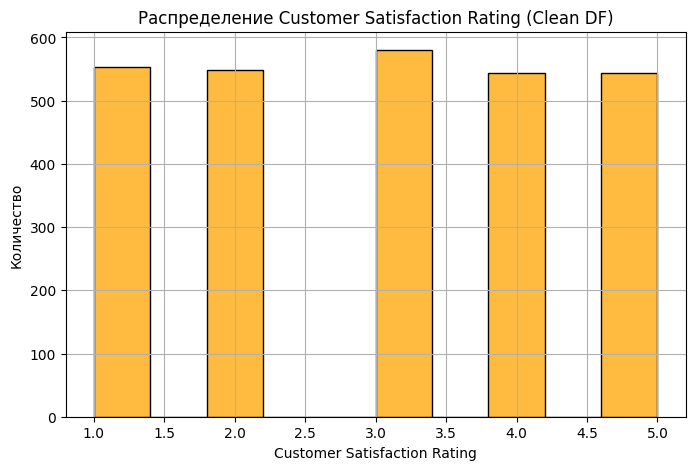


--- 📊 Статистика для Three Missing DF ---


,Ticket ID,Customer Age,Date of Purchase,First Response Time,Time to Resolution,Customer Satisfaction Rating
count,2881.000000,2881.000000,2881,2881,0,0.0
mean,4224.871572,44.001388,2020-12-28 20:00:04.998264576,2023-06-01 11:32:31.376605696,NaT,<NA>
min,1.000000,18.000000,2020-01-01 00:00:00,2023-05-31 22:01:53,NaT,<NA>
25%,2112.000000,31.000000,2020-06-26 00:00:00,2023-06-01 05:29:27,NaT,<NA>
50%,4220.000000,44.000000,2020-12-29 00:00:00,2023-06-01 11:29:43,NaT,<NA>
75%,6393.000000,57.000000,2021-06-30 00:00:00,2023-06-01 17:46:59,NaT,<NA>
max,8463.000000,70.000000,2021-12-30 00:00:00,2023-06-02 00:51:07,NaT,<NA>
std,2448.253532,15.108313,NaN,NaN,NaN,<NA>


⚠️ Недостаточно данных для построения графика по Customer Satisfaction Rating (Three Missing DF)

--- 📊 Статистика для Four Missing DF ---


,Ticket ID,Customer Age,Date of Purchase,First Response Time,Time to Resolution,Customer Satisfaction Rating
count,2819.000000,2819.000000,2819,0,0,0.0
mean,4243.225967,43.751330,2021-01-01 15:54:12.642780928,NaT,NaT,<NA>
min,6.000000,18.000000,2020-01-01 00:00:00,NaT,NaT,<NA>
25%,2098.500000,30.000000,2020-07-06 00:00:00,NaT,NaT,<NA>
50%,4262.000000,44.000000,2021-01-06 00:00:00,NaT,NaT,<NA>
75%,6358.000000,57.000000,2021-07-01 12:00:00,NaT,NaT,<NA>
max,8469.000000,70.000000,2021-12-30 00:00:00,NaT,NaT,<NA>
std,2440.502624,15.582591,NaN,NaN,NaN,<NA>


⚠️ Недостаточно данных для построения графика по Customer Satisfaction Rating (Four Missing DF)


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def basic_statistics_and_visualization(df, name="DataFrame"):
    """
    Строит описательную статистику и визуализацию распределения Customer Satisfaction Rating.
    Теперь с проверкой на NaN.
    """
    print(f"\n--- 📊 Статистика для {name} ---")
    display(df.describe())

    if 'Customer Satisfaction Rating' in df.columns and df['Customer Satisfaction Rating'].dropna().shape[0] > 0:
        plt.figure(figsize=(8, 5))
        sns.histplot(df['Customer Satisfaction Rating'].dropna(), kde=False, color='orange', bins=10, edgecolor='black')
        plt.title(f'Распределение Customer Satisfaction Rating ({name})')
        plt.xlabel('Customer Satisfaction Rating')
        plt.ylabel('Количество')
        plt.grid(True)
        plt.show()
    else:
        print(f"⚠️ Недостаточно данных для построения графика по Customer Satisfaction Rating ({name})")

basic_statistics_and_visualization(clean_df, name="Clean DF")
basic_statistics_and_visualization(three_missing_df, name="Three Missing DF")
basic_statistics_and_visualization(four_missing_df, name="Four Missing DF")



--- ANOVA (числовые признаки) ---

Customer Age: p-value = 0.3612 (✅ различий нет)


C:\Users\admin\AppData\Local\Temp\ipykernel_20024\1775848228.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_df, x='Group', y=col, palette='YlOrBr')


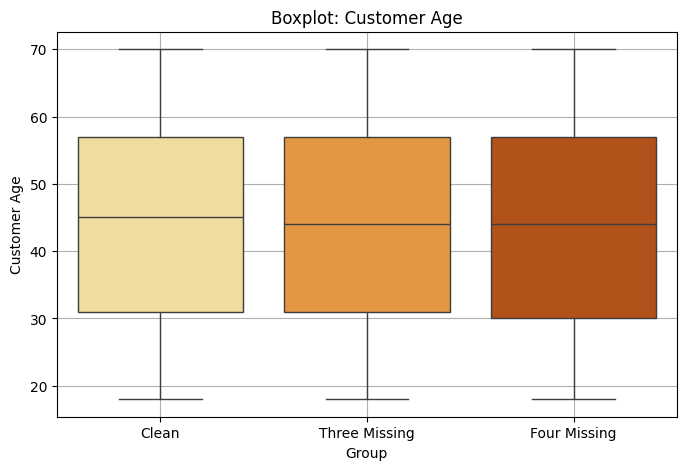

Customer Satisfaction Rating: недостаточно данных

--- Хи-квадрат (категориальные признаки) ---

Customer Gender: p-value = 0.2995 (✅ различий нет)


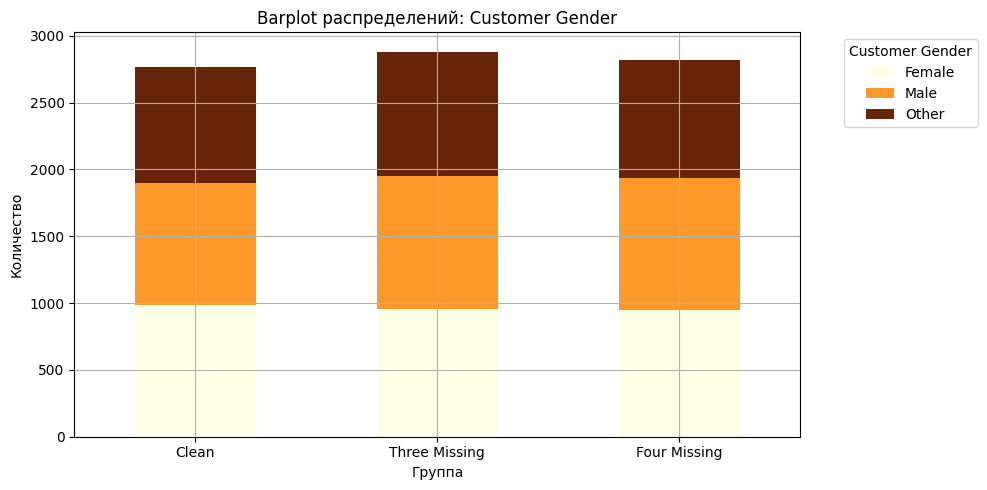


Ticket Channel: p-value = 0.7710 (✅ различий нет)


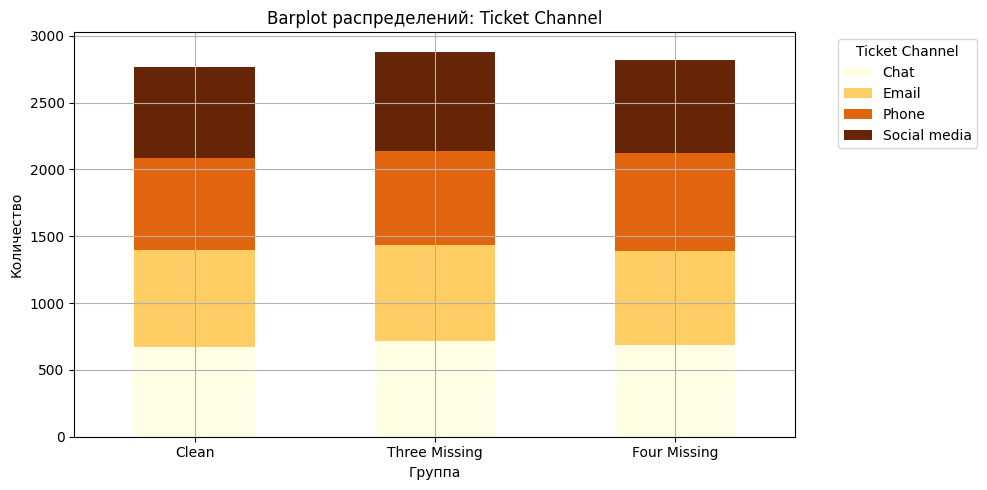


Ticket Type: p-value = 0.3394 (✅ различий нет)


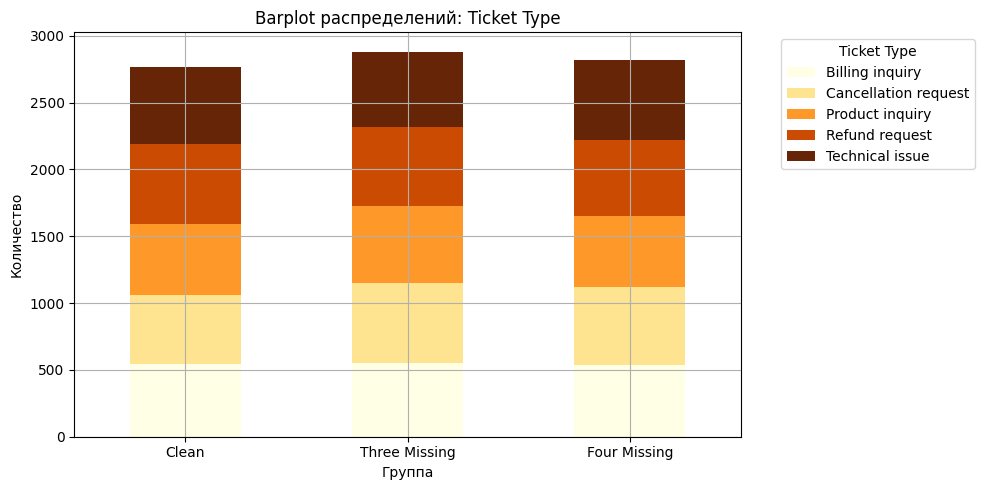

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, chi2_contingency

# --- 1. ANOVA + Boxplot ---
def run_anova_with_plots(clean_df, three_df, four_df, numeric_cols):
    print("\n--- ANOVA (числовые признаки) ---")
    for col in numeric_cols:
        if col in clean_df.columns:
            data1 = clean_df[col].dropna()
            data2 = three_df[col].dropna()
            data3 = four_df[col].dropna()

            if len(data1) > 0 and len(data2) > 0 and len(data3) > 0:
                f_stat, p_value = f_oneway(data1, data2, data3)
                print(f"\n{col}: p-value = {p_value:.4f} {'(❗различия есть)' if p_value < 0.05 else '(✅ различий нет)'}")

                # Boxplot
                plot_df = pd.concat([
                    pd.DataFrame({col: data1, 'Group': 'Clean'}),
                    pd.DataFrame({col: data2, 'Group': 'Three Missing'}),
                    pd.DataFrame({col: data3, 'Group': 'Four Missing'})
                ])
                plt.figure(figsize=(8, 5))
                sns.boxplot(data=plot_df, x='Group', y=col, palette='YlOrBr')
                plt.title(f"Boxplot: {col}")
                plt.grid(True)
                plt.show()
            else:
                print(f"{col}: недостаточно данных")

# --- 2. Chi² + Barplot ---
def run_chi2_with_plots(clean_df, three_df, four_df, cat_cols):
    print("\n--- Хи-квадрат (категориальные признаки) ---")
    for col in cat_cols:
        if col in clean_df.columns:
            clean_counts = clean_df[col].value_counts()
            three_counts = three_df[col].value_counts()
            four_counts = four_df[col].value_counts()

            combined = pd.DataFrame({
                'Clean': clean_counts,
                'Three Missing': three_counts,
                'Four Missing': four_counts
            }).fillna(0).astype(int)

            try:
                chi2, p, dof, expected = chi2_contingency(combined.T)
                print(f"\n{col}: p-value = {p:.4f} {'(❗различия есть)' if p < 0.05 else '(✅ различий нет)'}")

                # Визуализация barplot по группам
                combined.T.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='YlOrBr')
                plt.title(f"Barplot распределений: {col}")
                plt.ylabel("Количество")
                plt.xlabel("Группа")
                plt.grid(True)
                plt.xticks(rotation=0)
                plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
                plt.tight_layout()
                plt.show()

            except Exception as e:
                print(f"{col}: ошибка в χ²-тесте ({e})")

num_cols = ['Customer Age', 'Customer Satisfaction Rating']
cat_cols = ['Customer Gender', 'Ticket Channel', 'Ticket Type']

run_anova_with_plots(clean_df, three_missing_df, four_missing_df, num_cols)
run_chi2_with_plots(clean_df, three_missing_df, four_missing_df, cat_cols)



--- 📊 Дополнительный анализ Clean DF ---


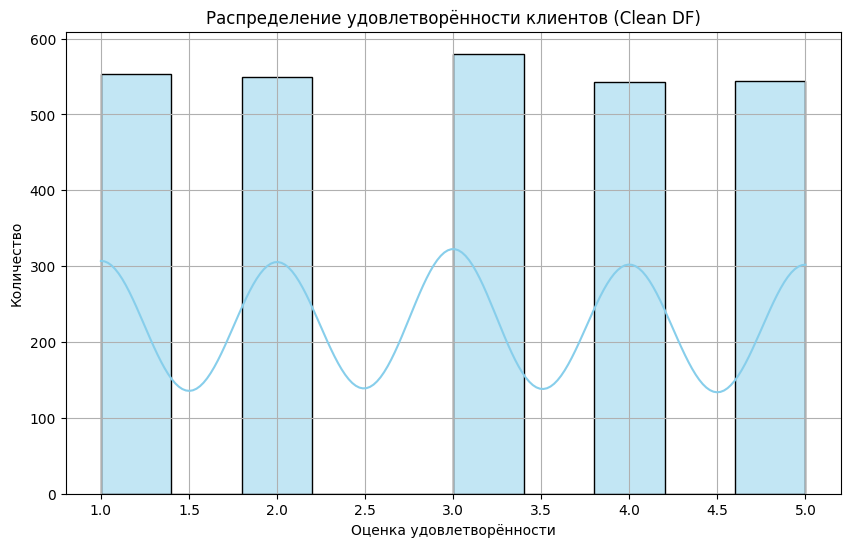

C:\Users\admin\AppData\Local\Temp\ipykernel_18424\1113716212.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ticket Priority', y='Customer Satisfaction Rating',


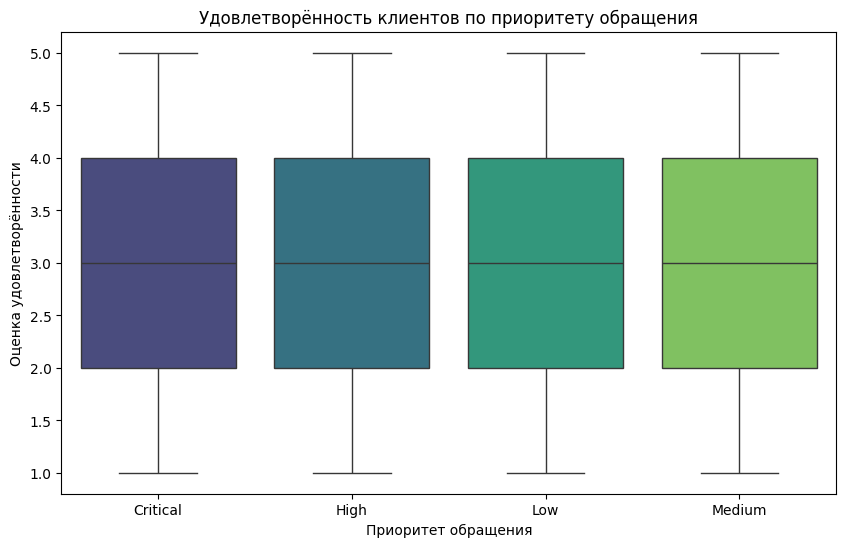

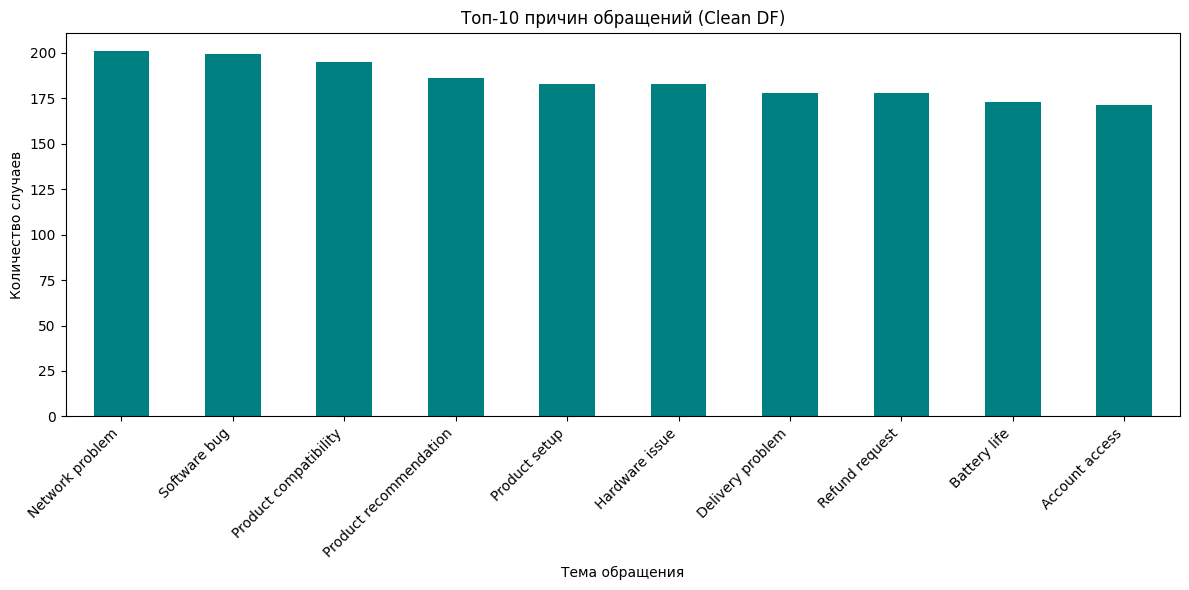

C:\Users\admin\AppData\Local\Temp\ipykernel_18424\1113716212.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Resolution Time'] = (clean_df['Time to Resolution'] - clean_df['First Response Time']).dt.total_seconds() / 3600


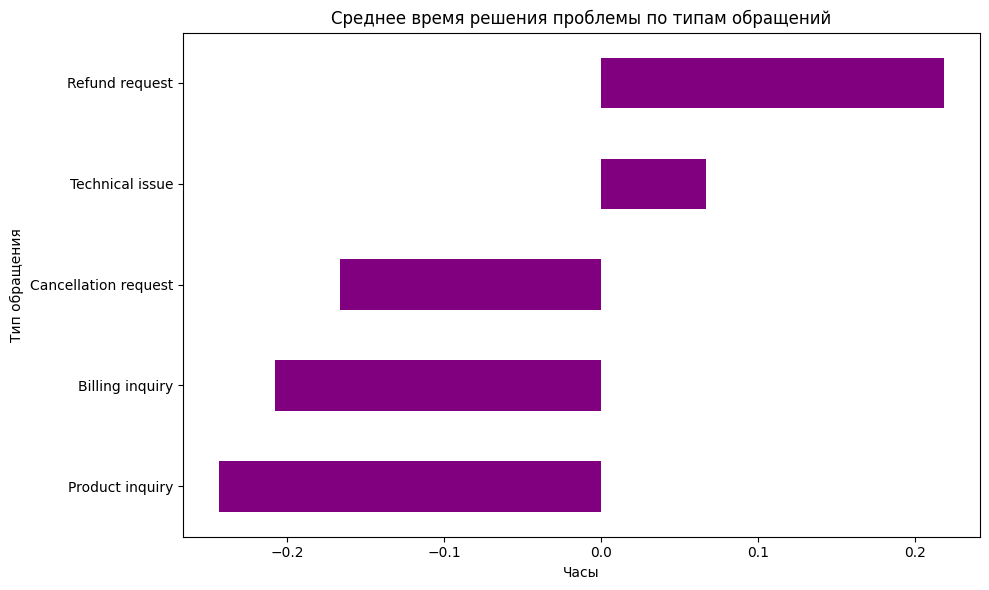

In [9]:
# Дополнительный анализ clean_df
print("\n--- 📊 Дополнительный анализ Clean DF ---")

# Анализ распределения Customer Satisfaction Rating
plt.figure(figsize=(10, 6))
sns.histplot(clean_df['Customer Satisfaction Rating'].astype(float), 
             bins=10, kde=True, color='skyblue')
plt.title('Распределение удовлетворённости клиентов (Clean DF)')
plt.xlabel('Оценка удовлетворённости')
plt.ylabel('Количество')
plt.grid(True)
plt.show()

# Анализ по приоритетам обращений
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ticket Priority', y='Customer Satisfaction Rating', 
            data=clean_df, palette='viridis')
plt.title('Удовлетворённость клиентов по приоритету обращения')
plt.xlabel('Приоритет обращения')
plt.ylabel('Оценка удовлетворённости')
plt.show()

# Самые частые причины обращений
plt.figure(figsize=(12, 6))
clean_df['Ticket Subject'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title('Топ-10 причин обращений (Clean DF)')
plt.xlabel('Тема обращения')
plt.ylabel('Количество случаев')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Среднее время решения по типам обращений
clean_df['Resolution Time'] = (clean_df['Time to Resolution'] - clean_df['First Response Time']).dt.total_seconds() / 3600
resolution_times = clean_df.groupby('Ticket Type')['Resolution Time'].mean().sort_values()

plt.figure(figsize=(10, 6))
resolution_times.plot(kind='barh', color='purple')
plt.title('Среднее время решения проблемы по типам обращений')
plt.xlabel('Часы')
plt.ylabel('Тип обращения')
plt.tight_layout()
plt.show()

In [12]:
# Вычтем дату создания тикета из времени ответа и времени решения
# (если у тебя есть дата создания обращения — используй её, а не Date of Purchase)

clean_df['First_Response_Duration'] = (clean_df['First Response Time'] - clean_df['Date of Purchase']).dt.total_seconds() / 60  # в минутах
clean_df['Resolution_Duration'] = (clean_df['Time to Resolution'] - clean_df['Date of Purchase']).dt.total_seconds() / 60  # в минутах


C:\Users\admin\AppData\Local\Temp\ipykernel_20024\3331396331.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['First_Response_Duration'] = (clean_df['First Response Time'] - clean_df['Date of Purchase']).dt.total_seconds() / 60  # в минутах
C:\Users\admin\AppData\Local\Temp\ipykernel_20024\3331396331.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Resolution_Duration'] = (clean_df['Time to Resolution'] - clean_df['Date of Purchase']).dt.total_seconds() / 60  # в минутах


In [35]:
from scipy.stats import normaltest
import matplotlib.pyplot as plt
import seaborn as sns

def check_normality_and_plot(series, name):
    series = series.dropna()
    stat, p = normaltest(series)
    print(f"🔍 {name} — p-value: {p:.4f}")
    if p < 0.05:
        print("❗️Распределение не является нормальным.")
    else:
        print("✅ Распределение близко к нормальному.")

    # Гистограмма
    plt.figure(figsize=(8, 4))
    sns.histplot(series, kde=True, color='orange')
    plt.title(f"Распределение: {name}")
    plt.xlabel(name)
    plt.grid(True)
    plt.show()

check_normality_and_plot(clean_df['First_Response_Duration'], 'First Response Time (min)')
check_normality_and_plot(clean_df['Resolution_Duration'], 'Time to Resolution (minut)')


KeyError: 'First_Response_Duration'

In [10]:
# Вычтем дату создания тикета из времени ответа и времени решения
# (если у тебя есть дата создания обращения — используй её, а не Date of Purchase)

clean_df['First_Response_Duration'] = (clean_df['First Response Time'] - clean_df['Date of Purchase']).dt.total_seconds() / 60  # в минутах
clean_df['Resolution_Duration'] = (clean_df['Time to Resolution'] - clean_df['Date of Purchase']).dt.total_seconds() / 60  # в минутах


C:\Users\admin\AppData\Local\Temp\ipykernel_18424\3331396331.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['First_Response_Duration'] = (clean_df['First Response Time'] - clean_df['Date of Purchase']).dt.total_seconds() / 60  # в минутах
C:\Users\admin\AppData\Local\Temp\ipykernel_18424\3331396331.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Resolution_Duration'] = (clean_df['Time to Resolution'] - clean_df['Date of Purchase']).dt.total_seconds() / 60  # в минутах


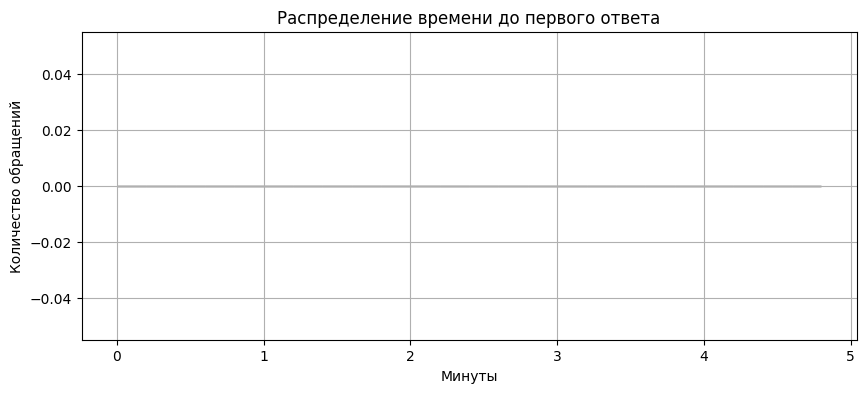

In [18]:
plt.figure(figsize=(10, 4))
sns.histplot(clean_df['First_Response_Duration'].dropna(), bins=np.arange(0, 5, 0.2), kde=False, color='orange')
plt.title("Распределение времени до первого ответа")
plt.xlabel("Минуты")
plt.ylabel("Количество обращений")
plt.grid(True)
plt.show()


ANOVA results for Customer Age: F-statistic = 1.0184, p-value = 0.3612


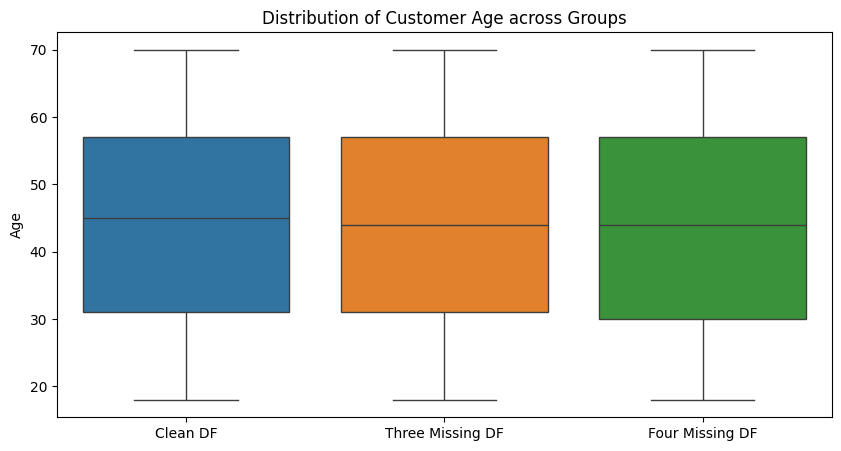

In [12]:
from scipy.stats import f_oneway

# Подготовка данных
groups = [
    clean_df['Customer Age'].dropna(),
    three_missing_df['Customer Age'].dropna(),
    four_missing_df['Customer Age'].dropna()
]

# Проведение ANOVA
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA results for Customer Age: F-statistic = {f_stat:.4f}, p-value = {p_value:.4f}")

# Визуализация распределения возраста
plt.figure(figsize=(10, 5))
sns.boxplot(data=pd.concat([
    clean_df['Customer Age'].rename('Clean DF'),
    three_missing_df['Customer Age'].rename('Three Missing DF'),
    four_missing_df['Customer Age'].rename('Four Missing DF')
], axis=1))
plt.title('Distribution of Customer Age across Groups')
plt.ylabel('Age')
plt.show()

In [21]:
# Создаём копию clean_df для безопасной модификации
clean_df = clean_df.copy()

# Преобразование времени в минуты с использованием .loc для избежания предупреждений
clean_df.loc[:, 'First Response Minutes'] = (
    clean_df['First Response Time'] - clean_df['Date of Purchase']
).dt.total_seconds() / 60

clean_df.loc[:, 'Resolution Minutes'] = (
    clean_df['Time to Resolution'] - clean_df['Date of Purchase']
).dt.total_seconds() / 60

# Проверяем результат
print(clean_df[['First Response Time', 'Date of Purchase', 'First Response Minutes', 
                'Time to Resolution', 'Resolution Minutes']].head())

   First Response Time Date of Purchase  First Response Minutes  \
2  2023-06-01 11:14:38       2020-07-14            1.515555e+06   
3  2023-06-01 07:29:40       2020-11-13            1.339650e+06   
4  2023-06-01 00:12:42       2020-02-04            1.746733e+06   
10 2023-06-01 17:46:49       2021-01-19            1.243787e+06   
11 2023-06-01 12:05:51       2021-10-24            8.431258e+05   

    Time to Resolution  Resolution Minutes  
2  2023-06-01 18:05:38        1.515966e+06  
3  2023-06-01 01:57:40        1.339318e+06  
4  2023-06-01 19:53:42        1.747914e+06  
10 2023-05-31 23:51:49        1.242712e+06  
11 2023-06-01 09:27:51        8.429678e+05  


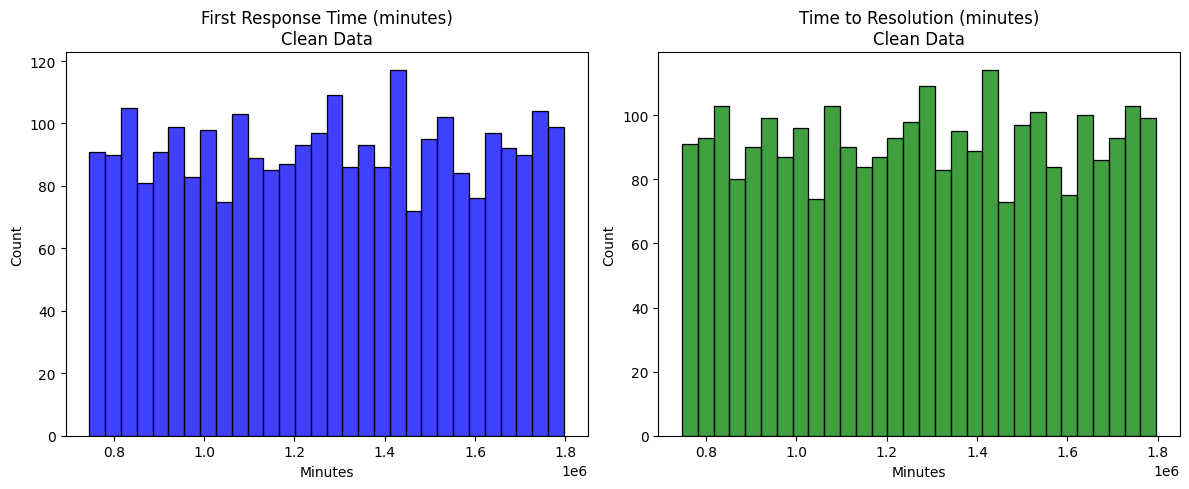

In [13]:
def plot_time_distributions(df, title):
    plt.figure(figsize=(12, 5))
    
    if 'First Response Minutes' in df.columns:
        plt.subplot(1, 2, 1)
        sns.histplot(df['First Response Minutes'].dropna(), color='blue', bins=30)
        plt.title(f'First Response Time (minutes)\n{title}')
        plt.xlabel('Minutes')
        
    if 'Resolution Minutes' in df.columns:
        plt.subplot(1, 2, 2)
        sns.histplot(df['Resolution Minutes'].dropna(), color='green', bins=30)
        plt.title(f'Time to Resolution (minutes)\n{title}')
        plt.xlabel('Minutes')
    
    plt.tight_layout()
    plt.show()

plot_time_distributions(clean_df, 'Clean Data')

In [23]:
# Описательная статистика новых столбцов
print("\nDescriptive statistics for time metrics:")
print(clean_df[['First Response Minutes', 'Resolution Minutes']].describe())

# Корреляция между временем ответа и решением
if 'First Response Minutes' in clean_df.columns and 'Resolution Minutes' in clean_df.columns:
    correlation = clean_df['First Response Minutes'].corr(clean_df['Resolution Minutes'])
    print(f"\nCorrelation between First Response and Resolution time: {correlation:.2f}")


Descriptive statistics for time metrics:
       First Response Minutes  Resolution Minutes
count            2.769000e+03        2.769000e+03
mean             1.274065e+06        1.274062e+06
std              3.045524e+05        3.045518e+05
min              7.461093e+05        7.463079e+05
25%              1.008388e+06        1.008496e+06
50%              1.278217e+06        1.278383e+06
75%              1.536532e+06        1.536833e+06
max              1.796548e+06        1.796824e+06

Correlation between First Response and Resolution time: 1.00
